In [1]:
from mino import BasicAgent, BasicMinorityGame

import matplotlib.pyplot as plt
from tqdm import trange # 这个库是用来在命令行显示进度条的

## 模块说明

两个类`BasicMinorityGame`/`BasicAgent`实现了 9.3.1.2 的基本游戏机制

### 1. BasicMinorityGame
接受设定：
- 玩家数`num_agent`: 教材记为$N$
- 记忆长度`mem`: 教材记为$M$
- 玩家可用策略数`agent_choice`: 教材记为$k$

成员：
- 策略空间`.strategy_space`: 以numpy数组实现,大小为($2^M$, $2^{2^M}$)
- 历史记录`.rec`: 以deque队列实现，永远保持长度为$M$

核心函数：
- `.forward()`: 模拟一次游戏并按规则更新每个玩家的胜负记录

其它函数：
- `.__decode_current_rec__()`: 将`.rec`记录的历史信息转化为策略空间的行编号以进行查询
- `.__init_agents__()`: 单独实现出来，由构造函数调用，方便日后继承子类时只重写该部分
- `.__str__()`: 便于用`print()`查看具体信息
- 其它略


### 2. BasicAgent
接受设定：
- 可选策略`choices`: 一个列表，记录Game里的策略空间中的若干列的编号

成员：
- 策略空间`.scores`: 与`choices`等长，表示对应策略的评分，教材记为"virtual point"
- 当前策略`.current_choice`: 临时记录目前随机选用的策略是哪一个，方便更新时使用

核心函数：
- `.__call__()`: 可以像调用函数一样调用Agent，会随机选择一个策略作为`.current_choice`并返回给调用者

其它函数：
- `.update()`: Game评估完胜负后调用该函数，根据胜负更新对应策略的score
- `.__str__()`: 便于用`print()`查看具体信息
- 其它略

## 简单执行
基本设定（参考教材）

In [2]:
N=2001
M=2


创建一桌基本少数派游戏，用print查看具体信息

In [3]:

g = BasicMinorityGame(num_agent=N, mem=M)

print(g)


BasicMinorityGame
	N= 2001
	M= 2
	StrategySpace: (4, 16)

BasicMinorityGame
	N= 2001
	M= 2
	StrategySpace: (4, 16)



做一次forward，查看返回的信息
- 第一个返回值是$A_1$
- 第二个返回值具体记录了每个玩家的行为选择

In [4]:
print(g.forward())

(965, array([1, 1, 1, ..., 0, 0, 0]))


还可以查看每个agent所持有的各个策略的计分

In [5]:
for a in g.agent_list:
    print(a)

Agent:
	8:	score=0
	15:	score=1

Agent:
	9:	score=1
	12:	score=0

Agent:
	12:	score=1
	13:	score=0

Agent:
	7:	score=0
	14:	score=1

Agent:
	5:	score=0
	0:	score=0

Agent:
	9:	score=0
	13:	score=1

Agent:
	5:	score=0
	12:	score=0

Agent:
	15:	score=0
	8:	score=1

Agent:
	5:	score=0
	8:	score=0

Agent:
	4:	score=0
	10:	score=0

Agent:
	8:	score=0
	4:	score=0

Agent:
	0:	score=0
	11:	score=1

Agent:
	9:	score=1
	10:	score=0

Agent:
	9:	score=0
	11:	score=1

Agent:
	2:	score=0
	8:	score=0

Agent:
	15:	score=1
	2:	score=0

Agent:
	13:	score=0
	4:	score=0

Agent:
	14:	score=0
	2:	score=0

Agent:
	4:	score=0
	8:	score=1

Agent:
	14:	score=0
	6:	score=0

Agent:
	9:	score=1
	4:	score=0

Agent:
	3:	score=0
	2:	score=0

Agent:
	1:	score=0
	3:	score=0

Agent:
	11:	score=1
	5:	score=0

Agent:
	14:	score=1
	1:	score=0

Agent:
	14:	score=0
	3:	score=0

Agent:
	12:	score=0
	2:	score=0

Agent:
	7:	score=0
	13:	score=0

Agent:
	6:	score=0
	5:	score=0

Agent:
	8:	score=1
	15:	score=0

Agent:
	7:	score=0

## 正式执行：模拟

教材模拟了5000次，这里也模拟5000次

In [6]:
n_simu = 5000

In [7]:
A1 = []
for i in trange(n_simu):
    utility, behavior = g.forward()
    A1.append(utility)

100%|██████████| 5000/5000 [00:24<00:00, 205.60it/s]


得到教材图9.6(a)一致的结果

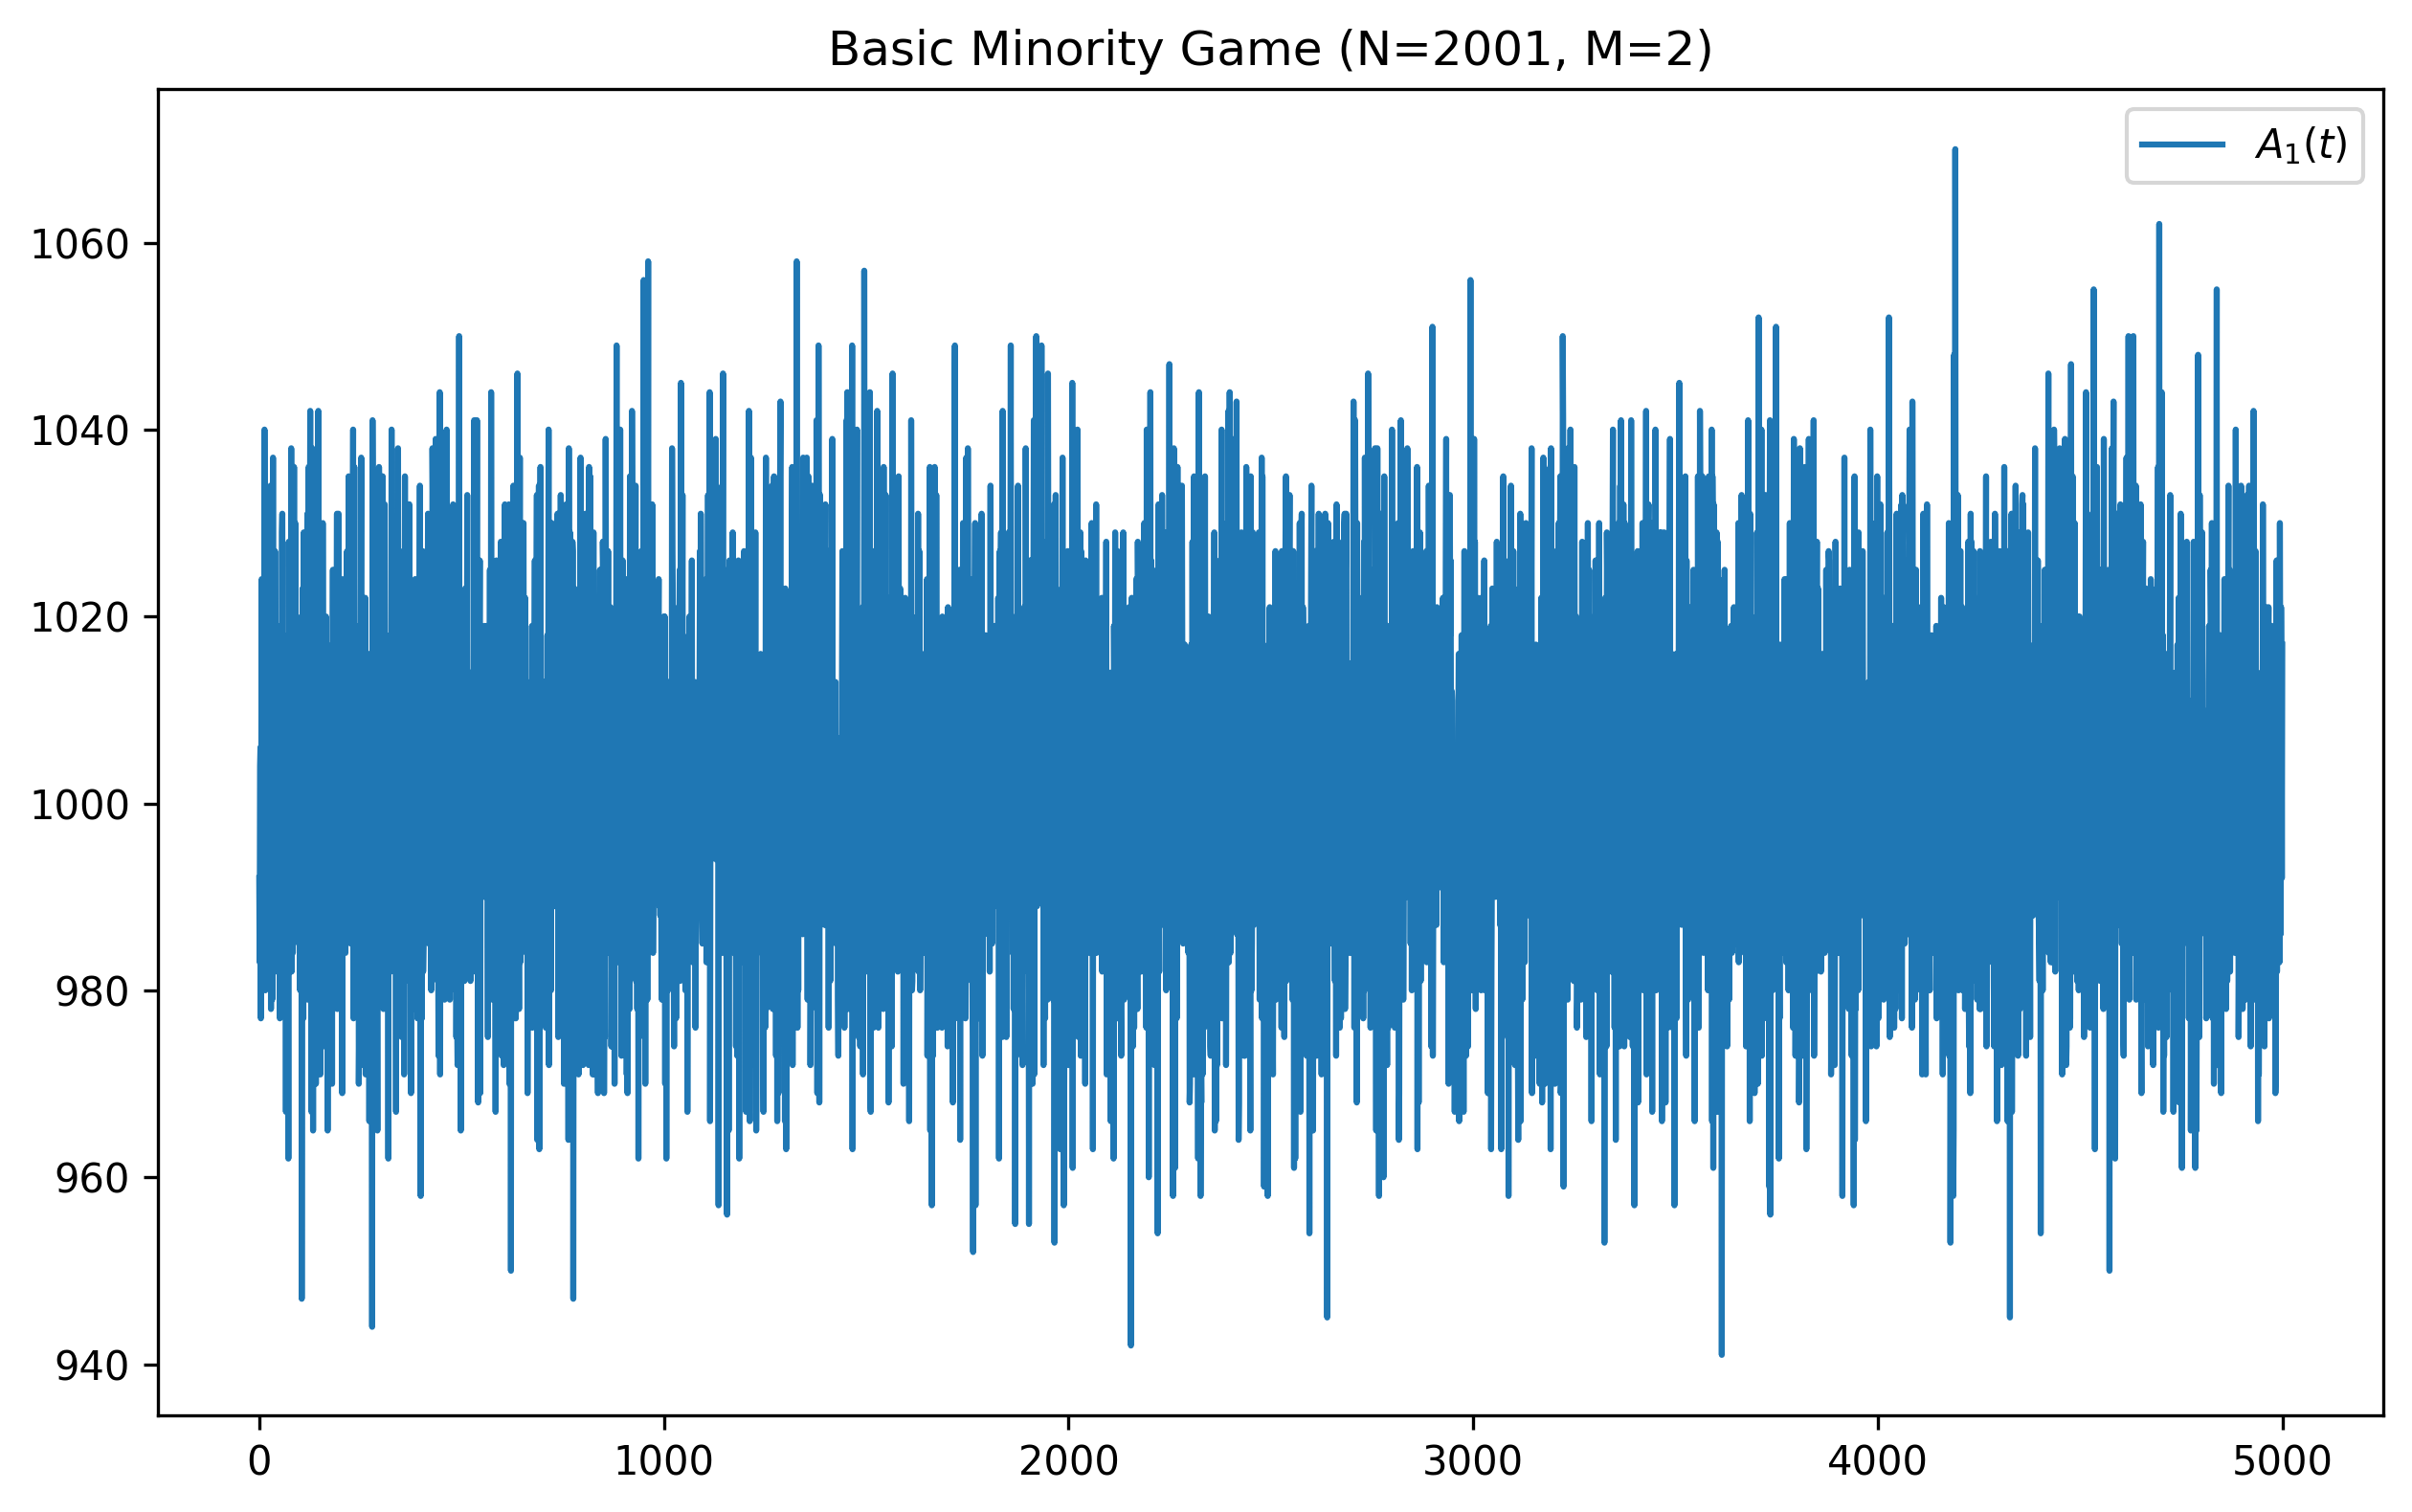

In [8]:
plt.figure(figsize=(10,6), dpi=300)
plt.plot(A1, label='$A_1(t)$')


plt.title(f"Basic Minority Game (N={N}, M={M})")
plt.legend()
plt.show()

查看各个玩家的策略计分

In [9]:
for a in g.agent_list:
    print(a)

Agent:
	8:	score=1397
	15:	score=1137

Agent:
	9:	score=1650
	12:	score=1024

Agent:
	12:	score=940
	13:	score=1338

Agent:
	7:	score=1127
	14:	score=869

Agent:
	5:	score=1279
	0:	score=1350

Agent:
	9:	score=1705
	13:	score=1260

Agent:
	5:	score=1305
	12:	score=1003

Agent:
	15:	score=1109
	8:	score=1314

Agent:
	5:	score=1240
	8:	score=1318

Agent:
	4:	score=975
	10:	score=1200

Agent:
	8:	score=1361
	4:	score=974

Agent:
	0:	score=1353
	11:	score=1442

Agent:
	9:	score=1589
	10:	score=1220

Agent:
	9:	score=1694
	11:	score=1456

Agent:
	2:	score=1228
	8:	score=1351

Agent:
	15:	score=1145
	2:	score=1165

Agent:
	13:	score=1307
	4:	score=942

Agent:
	14:	score=857
	2:	score=1192

Agent:
	4:	score=1036
	8:	score=1326

Agent:
	14:	score=850
	6:	score=856

Agent:
	9:	score=1629
	4:	score=1024

Agent:
	3:	score=1446
	2:	score=1253

Agent:
	1:	score=1628
	3:	score=1489

Agent:
	11:	score=1506
	5:	score=1255

Agent:
	14:	score=826
	1:	score=1639

Agent:
	14:	score=856
	3:	score=1430

Age

## 后续:

- 接下来很容易可以从上述记录找出performance最好的玩家并画出教材图9.6(b)

- 下一步根据 9.3.1.4 的内容，分别将`BasicMinorityGame`和`BasicAgent`继承出两个基类，实现其中的繁衍更新策略